# Exercise: Classify Flowers with a Decision Tree

In this exercise, we'll classify three different iris flower types using a decision tree classifier. 

Your tasks are the following:

- Identify the data types of `X` and `y`
- Get an overview of the dataset
- Plot a histogram of the data
- Split into training and test data
- Examine the shape of your training data
- Train a decision tree
- Make predictions with your model
- Calculate the accuracy

## 1. Data Analysis

In [3]:
# import packages
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# load data
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [5]:
# store features and labels in X and y
X = iris.data
y = iris.target

In [6]:
# print description of dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

**TODO**: Which data types are X and y, respectively?

In [7]:
print(type(X),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


**YOUR ANSWER**:

**TODO**: Get an overview of the dataset and answer the following questions:
- How many features are in the dataset?
- How many samples are in the dataset?
- Which labels do exist?
- Are there empty data entries that we have to take care of?
- Are there categorical or numerical attributes?

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.frame.shape

(150, 5)

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris.frame.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [12]:
iris.frame.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

**YOUR ANSWER**:

**TODO**: Plot a histogram of the data. Can you guess which features might be more important than others?

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

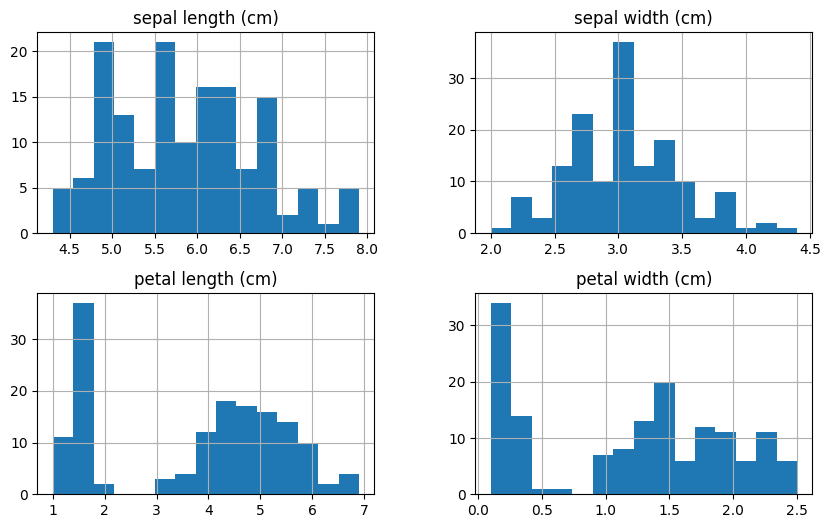

In [13]:
X.hist(figsize=(10, 6), bins=15)

**YOUR ANSWER**:

# 2. Training and Evaluation

In [14]:
# we only use 2 features for training
X = iris.data[["petal length (cm)", "petal width (cm)"]]

**TODO**: Split `X` and `y` in training and test data. Save the result in variables called `X_train`, `X_test`, `y_train`, `y_test`. 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

**TODO**: How many samples are contained in `X_test`? Which data format do we have here?

In [16]:
print(X_test.shape , type(X_test))

(30, 2) <class 'pandas.core.frame.DataFrame'>


**YOUR ANSWER**:

**TODO**: Fit a `DecisionTreeClassifier` with `max_depth=3` and `random_state` set to a value of your choice on the training data!

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, random_state=42)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

**TODO**: Calculate the predictions on training and test data and save the result in `y_pred_train` and `y_pred_test`, respectively.

In [18]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

**TODO**: Evaluate your model by calculating the accuracy on training and test data, i.e. the number of correctly classified samples normalized over all samples:

$
\text{Accuracy} = \frac{\text{\# correctly classified samples}}{\text{\# samples}}
$

In [20]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [21]:
print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

Training accuracy: 0.9583333333333334
Test accuracy: 1.0
